<a href="https://colab.research.google.com/github/PrateekTh/Algo_Ds/blob/master/vg_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of VG Sales Data

This project aims at evaluating Videogames sales data, up-to-date till 2024, and achieve valuable insights in the process. Several trends that can be observed through the analysis are expanded on at each step

Eventually, K-Prototype clustering is performed in the end, to identify key differences and hallmark properties of games that have been performing really well (and ones that are not), in sales, based on features in the dataset.

#Setup

Setting up data, and observing various key properties of the dataset.

###Loading Data & Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/input/video-game-data/vg-charts-24.csv')

In [3]:
df.shape

(64016, 14)

In [4]:
df.head()

img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09   

   na_sales  jp_sales  pal_sales  other_sales release_date last_update  
0      6.37      0.99       9.85         3.12   2013-09-17         NaN  
1      6.06      0.60       9.71         3.02   2014-11-18  2018-01-03  
2      8.41      0.47       5.49         1.78   2002-10-28         NaN  
3      9.06      0.06       5.33         1.42   2013-09-17         NaN  
4      6.18      0.41       6.05         2.44   2015-11-06  2018-01-14

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [6]:
df.describe().T

count      mean       std  min   25%   50%   75%    max
critic_score   6678.0  7.220440  1.457066  1.0  6.40  7.50  8.30  10.00
total_sales   18922.0  0.349113  0.807462  0.0  0.03  0.12  0.34  20.32
na_sales      12637.0  0.264740  0.494787  0.0  0.05  0.12  0.28   9.76
jp_sales       6726.0  0.102281  0.168811  0.0  0.02  0.04  0.12   2.13
pal_sales     12824.0  0.149472  0.392653  0.0  0.01  0.04  0.14   9.85
other_sales   15128.0  0.043041  0.126643  0.0  0.00  0.01  0.03   3.12

In [7]:
df.isna().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

# Data Exploratory Analysis

Visualisation of data, across various methods and with different criteria, to perform exploratory data analysis and draw insights.

##Top Selling Games

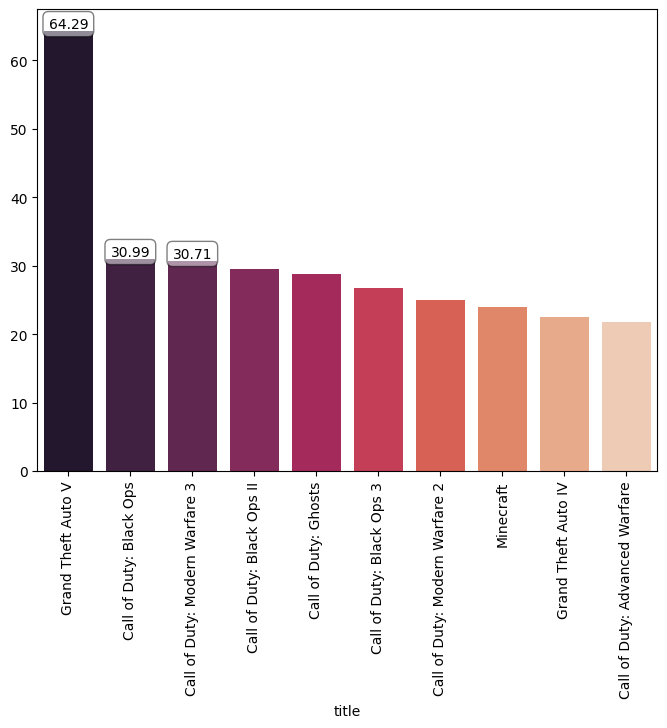

In [8]:
top_selling_games=df.groupby('title')['total_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
ax=sns.barplot(x=top_selling_games.index, y=top_selling_games.values,palette='rocket')
for i in range (0,3):
  ax.bar_label(ax.containers[i], label_type='edge', fontsize=10, color='black',
              bbox=dict(boxstyle='round, pad=0.4', facecolor='white', alpha=0.5))

plt.xticks(rotation=90)
plt.show()

Observing the highest selling games, we can derive certain key titles, and perform case studies on release strategies, and other factors contributing to their success.

1. **Grand Theft Auto V:** Here, we can observe that GTA V certainly has the highest of cross-platform sales, as compared to any other entry. This can be attributed to  the extensive marketing campaigns, re-releases in successive years on different platform. The release of GTA Online in 2015, and continuous release of updates throughout the years contributed heavily to the sales as well.

2. **Call of Duty Franchise:** Recent Call of Duty titles cover a significant portion of the observed list.

3. **Minecraft:** Minecraft, which started as an indie project has over the years amassed a solid fanbase, and there can be several key factors attributed to it's success:

## Platform-wise Top-Selling games

In [9]:
platforms = df.groupby(['title', 'console'])['total_sales'].sum().sort_values(ascending=False).head(10)

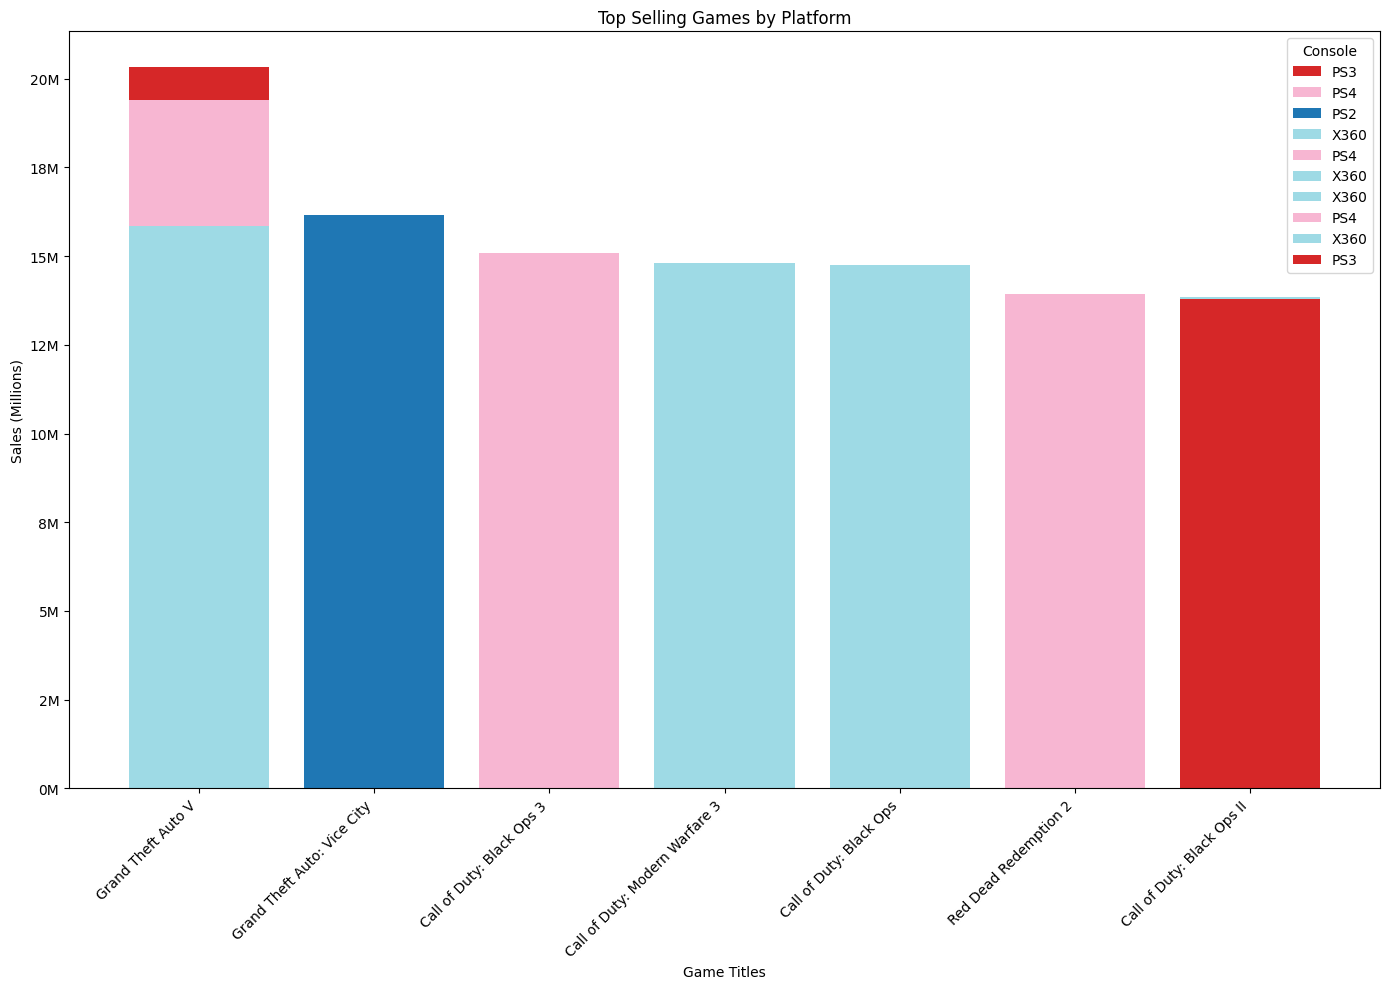

In [10]:
titles = [index[0] for index in platforms.index]
consoles = [index[1] for index in platforms.index]
sales = platforms.values
unique_consoles = np.unique(consoles)
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_consoles)))
console_colors = dict(zip(unique_consoles, colors))

# Convert sales to millions
sales_in_millions = sales  # dividing by 1 million to get the values in millions
#sales_in_millions = sales / 1e6  # dividing by 1 million to get the values in millions

plt.figure(figsize=(14, 10))
for i in range(len(titles)):
    console = consoles[i]
    color = console_colors[console]
    plt.bar(titles[i], sales_in_millions[i], color=color, label=console)

plt.xlabel('Game Titles')
plt.ylabel('Sales (Millions)')
plt.title('Top Selling Games by Platform')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Console',loc='best')

# Add "Millions" to y-axis tick labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.tight_layout()
plt.show()

The top games of each platform can be identified from the above list.

1. PlayStation 3: GTAV
2. PlayStation 4: Red Dead Redemption 2
3.

## Publisher Analysis

As we can see in the above analysis, the top games have certain consistencies in terms of Publishers.

The success of Activision may be observed due to the high brand value of Call of Duty.

Rockstar Games stands out with a consistent sales record on several titles.

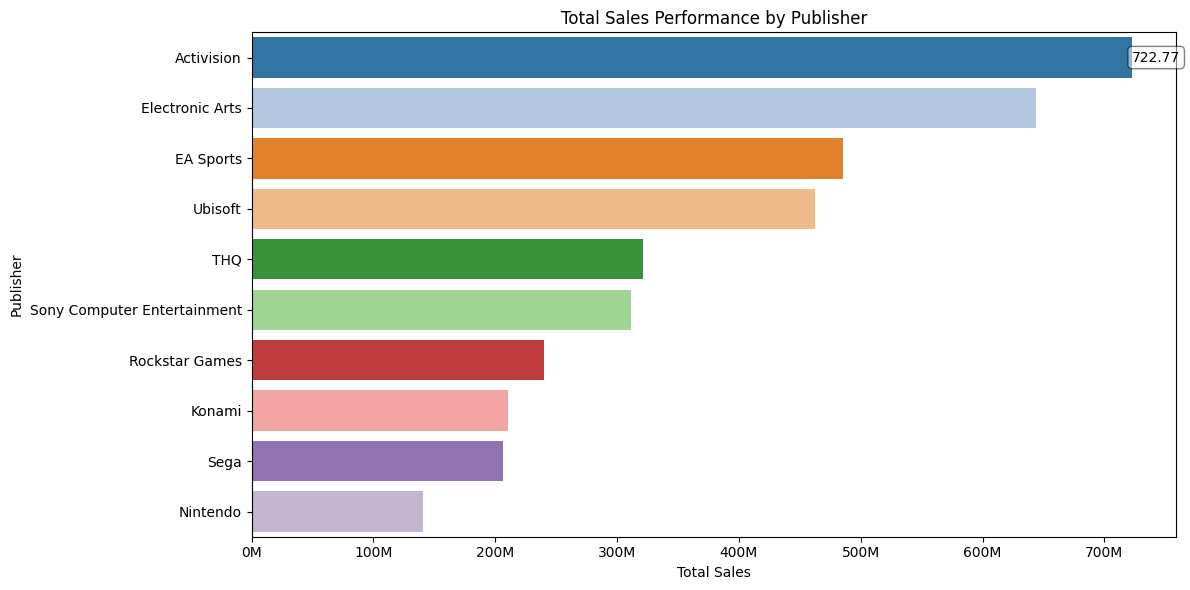

In [11]:
genre_stats=df.groupby('genre').agg({
    'critic_score':'median',
    'total_sales':'sum'
})
sorted_genres_by_score=genre_stats.sort_values(by='critic_score',ascending=False)
sorted_genres_by_sales=genre_stats.sort_values(by='total_sales',ascending=False)

publisher_stats = df.groupby('publisher').agg({
    'title': 'count',
    'total_sales': 'sum'
}).reset_index()

# Sort publishers by number of releases
sorted_publishers_by_num = publisher_stats.sort_values(by='title', ascending=False).head(10)
sorted_publishers_by_sales = publisher_stats.sort_values(by='total_sales', ascending=False).head(10)
palette = sns.color_palette("tab20", len(sorted_genres_by_score))

# Plot sales performance by publisher
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='total_sales', y='publisher', data=sorted_publishers_by_sales, palette=palette)
ax.bar_label(ax.containers[0],label_type='edge',fontsize=10,color='black',
            bbox=dict(boxstyle='round,pad=0.3',facecolor='white',alpha=0.5))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.title('Total Sales Performance by Publisher')
plt.xlabel('Total Sales')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

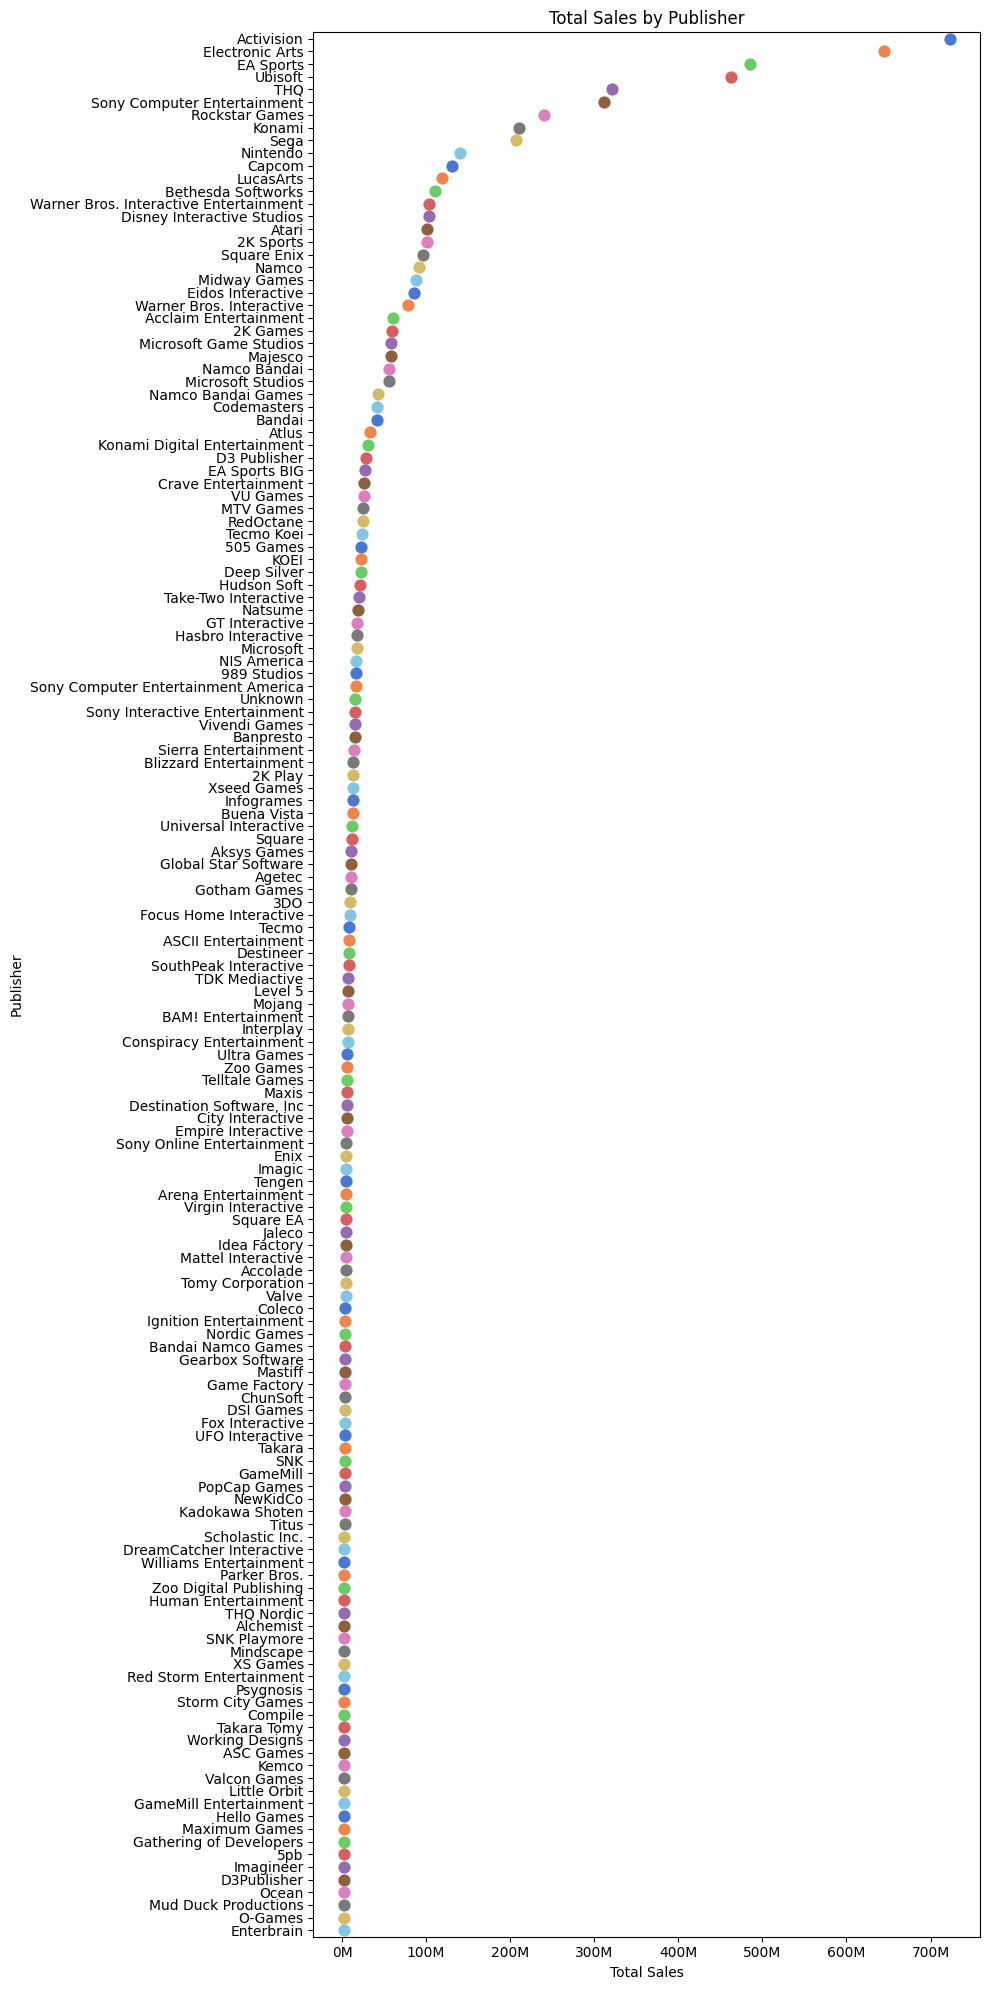

In [12]:
publisher_sales = df.groupby('publisher')['total_sales'].sum().reset_index()

# Sort publishers by total sales
sorted_publishers = publisher_sales.sort_values(by='total_sales', ascending=False).head(150)

# Plot total sales by publisher using a point plot
plt.figure(figsize=(10, 20))
ax=sns.pointplot(x='total_sales', y='publisher', data=sorted_publishers, join=False, palette='muted')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))
plt.xlabel('Total Sales')
plt.ylabel('Publisher')
plt.title('Total Sales by Publisher')
plt.tight_layout()
plt.show()

##Genre Based Analysis

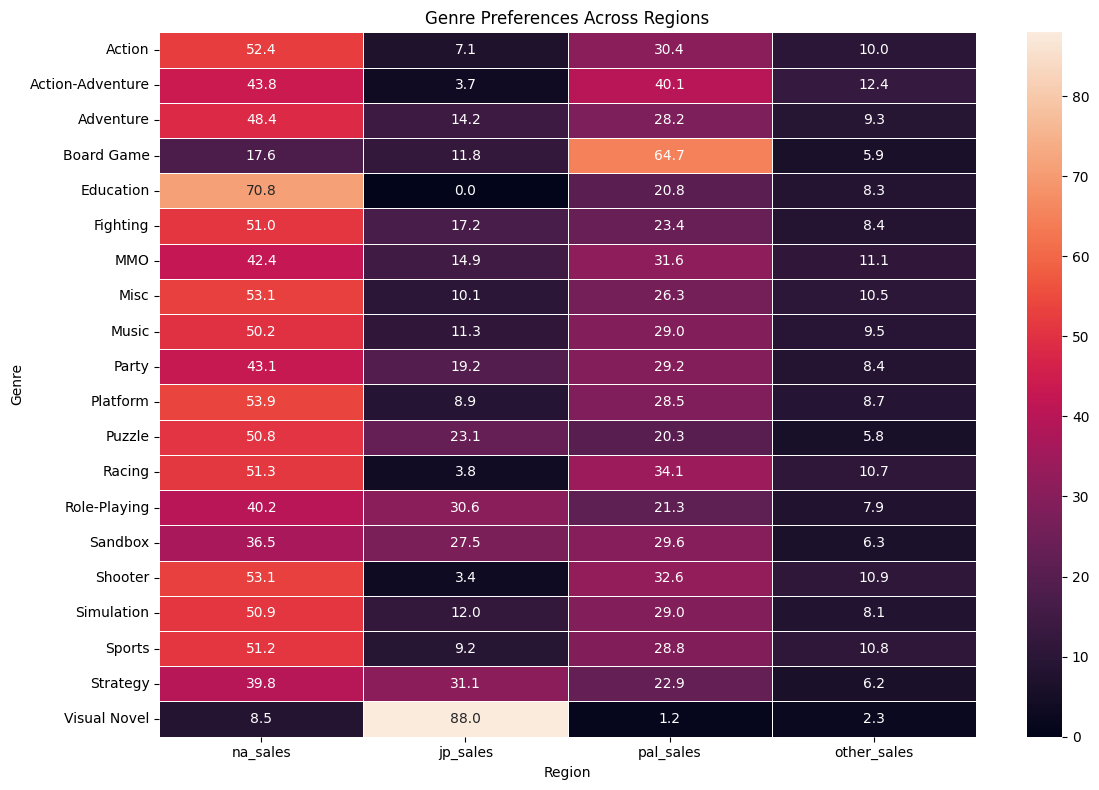

In [13]:
genre_sales = df.groupby('genre')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

# Normalize sales data to get percentages
genre_sales_normalized = genre_sales.div(genre_sales.sum(axis=1), axis=0) * 100

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_sales_normalized, cmap='rocket', annot=True, fmt='.1f', linewidths=.5)
plt.title('Genre Preferences Across Regions')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

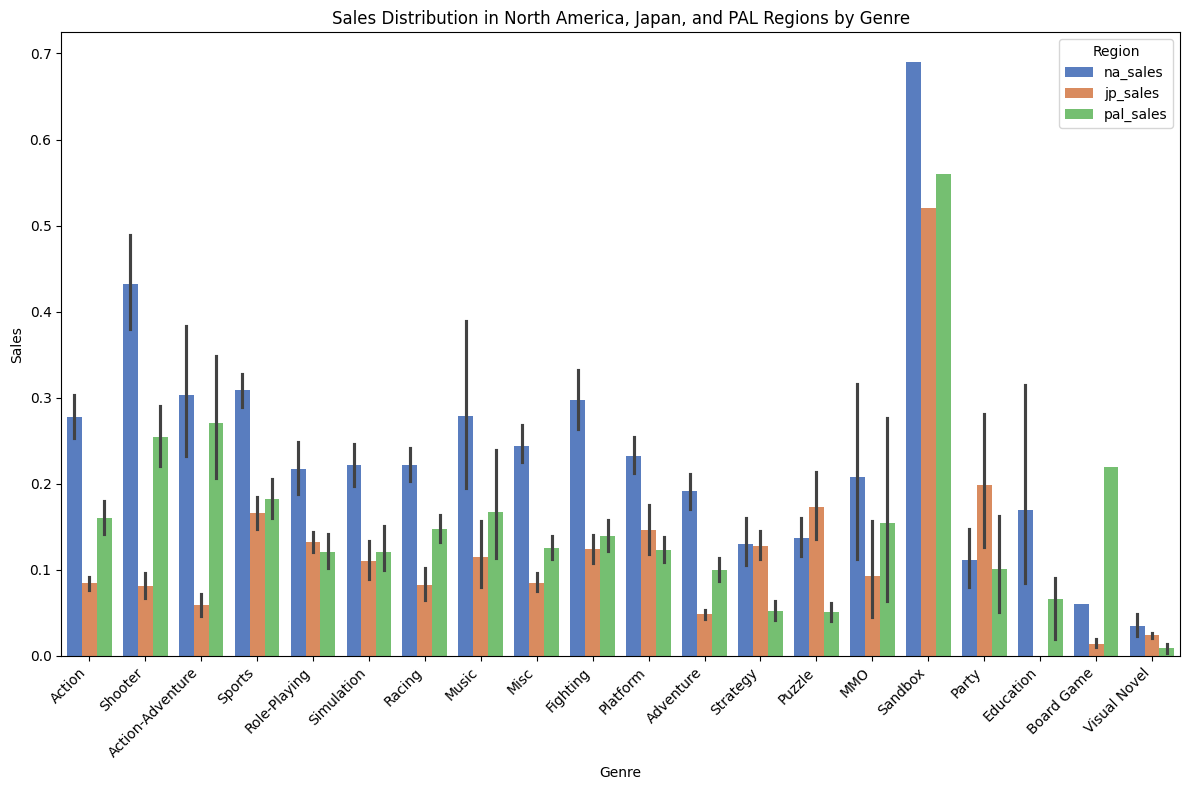

In [14]:
sales_data = df[['genre', 'na_sales', 'jp_sales', 'pal_sales']]

# Melt the DataFrame to long format for easier plotting
sales_data_melted = sales_data.melt(id_vars='genre', var_name='region', value_name='sales')

# Plot grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_data_melted, x='genre', y='sales', hue='region', palette='muted')
plt.title('Sales Distribution in North America, Japan, and PAL Regions by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', loc='upper right')
plt.tight_layout()
plt.show()

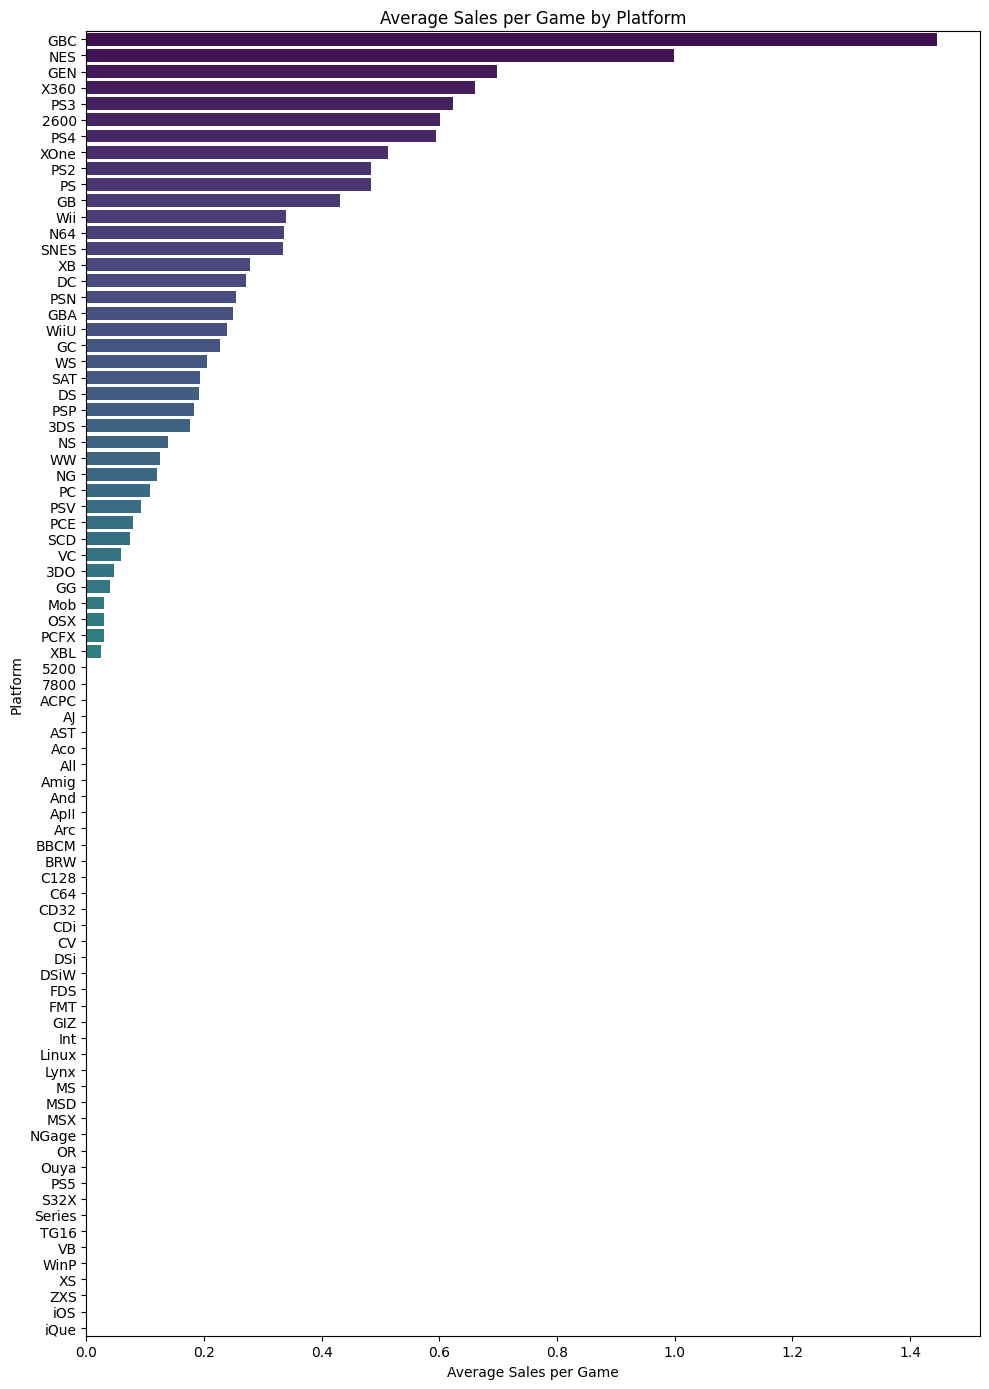

In [15]:
average_sales_per_game = df.groupby('console')['total_sales'].mean().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 14))
sns.barplot(x=average_sales_per_game.values, y=average_sales_per_game.index, palette='viridis')
plt.xlabel('Average Sales per Game')
plt.ylabel('Platform')
plt.title('Average Sales per Game by Platform')
plt.tight_layout()
plt.show()


There are quite a few conclusions that may be hypothesized on the above data:


## Release Date and Sales

In [62]:
import plotly.express as px
import plotly.graph_objects as go

In [53]:
df['release_date'] = pd.to_datetime(df['release_date'])


# # Plotting the scatter plot
# plt.figure(figsize=(12, 6))
# plt.scatter(df['release_date'], df['total_sales'], alpha=0.2,c='r',marker='^')
# plt.title('Release Dates vs. Sales Performance')
# plt.xlabel('Release Date')
# plt.ylabel('Total Sales')
# plt.tight_layout()
# plt.show()

In [58]:
px.scatter(df, x = 'release_date', y = 'total_sales', color = 'genre', hover_name='title')

In [99]:
fig = px.scatter( x = df['release_date'], y = df['total_sales'], hover_name=df['title'],
                 facet_col= df['genre'], facet_col_wrap=4,  height=1500, width=1500, facet_row_spacing=0.04, )

fig.show()

In [57]:

# long_term_period = pd.DateOffset(years=1)

# df['long_term_end_date'] = df['release_date'] + long_term_period
# long_term_sales = df[df['release_date'] <= df['long_term_end_date']]
# long_term_sales_agg = long_term_sales.groupby('title')['total_sales'].sum().reset_index()
# long_term_sales_agg = long_term_sales_agg.sort_values(by='total_sales', ascending=False)
# plt.figure(figsize=(12, 6))
# top_n = 10
# plt.barh(long_term_sales_agg['title'].head(top_n), long_term_sales_agg['total_sales'].head(top_n), color='skyblue')
# plt.xlabel('Total Sales (Millions)', fontsize=12)
# plt.ylabel('Game Title', fontsize=12)
# plt.title(f'Top {top_n} Games with Sustained Long-Term Sales', fontsize=14)
# plt.gca().invert_yaxis()

# for index, value in enumerate(long_term_sales_agg['total_sales'].head(top_n)):
#     plt.text(value, index, f'{value:.2f}M', ha='left', va='center', fontsize=10)

# plt.tight_layout()
# plt.show()

Several interesting observations can be made, based on the above interactive graphs.

* There is definitely an emergent pattern on sucess of games based on release months, in the recent years, especially 2008 onwards. The titles released in standard mid Q3 to mid Q4 time period show consistently the highest sales in any given year. This may be attributed to several factors.

* With respect to the evolution of the gaming audience and its demands, certain genres have emerged throughout different time periods. Also, in the facet graph, the Total Sales performance of all genres can be seen, to see their peak performance, w.r.t to the time periods.

##Critic Scores

In [18]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['platform_category'] = np.where(df['release_date'].dt.year < 2015, 'Older', 'Newer')

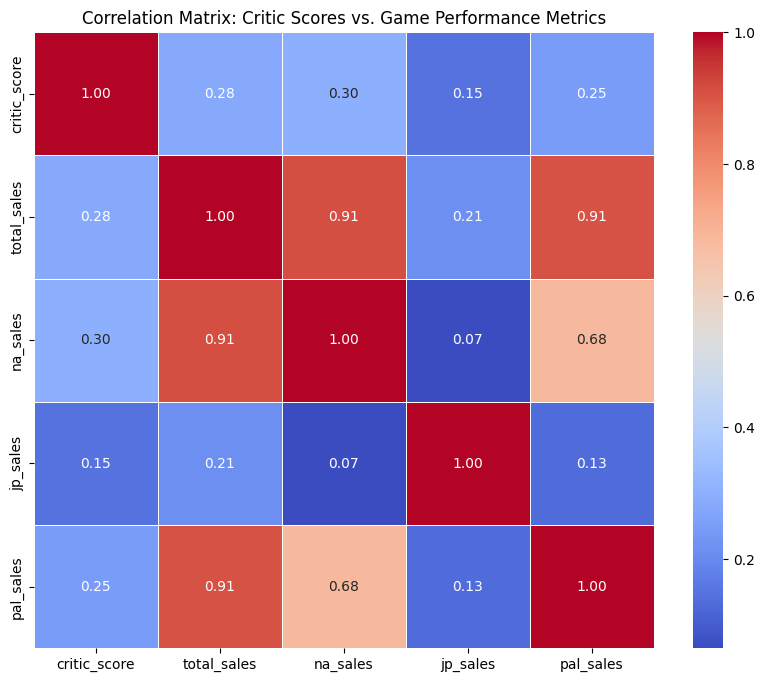

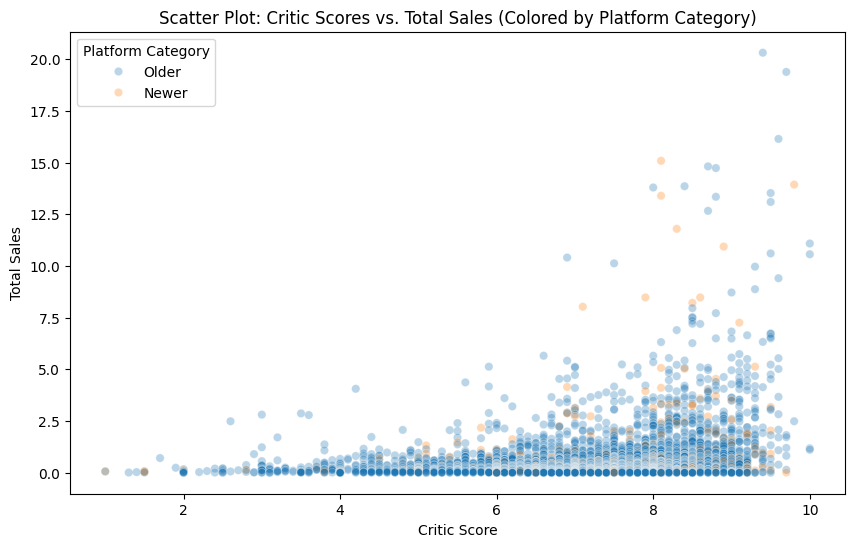

In [19]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['last_update'] = pd.to_datetime(df['last_update'])

correlation_matrix = df[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Critic Scores vs. Game Performance Metrics')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='critic_score', y='total_sales', hue='platform_category', alpha = 0.3)
plt.title('Scatter Plot: Critic Scores vs. Total Sales (Colored by Platform Category)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.legend(title='Platform Category')
plt.show()

#Clustering based on Regional Sales Data

In [20]:
# data modeling libraries
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import ward, dendrogram, linkage, cut_tree
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# model performance evaluation libraries
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA #0

In [21]:
data_sales = df[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']]


In [22]:
data_sales.isnull().sum()

na_sales       51379
jp_sales       57290
pal_sales      51192
other_sales    48888
dtype: int64

In [23]:
data_sales = data_sales.dropna()

In [24]:
# instantiating the scaler
scaler = StandardScaler()

# fit and transform
df_scale = scaler.fit_transform(data_sales)
df_scale.shape

(2222, 4)

In [25]:
df_kmeans_3 = data_sales.copy()

kmeans_3 = KMeans(n_clusters=4, random_state=0).fit(df_scale)
df_kmeans_3['cluster'] = kmeans_3.labels_


In [26]:
df_kmeans_3.head(100)

na_sales  jp_sales  pal_sales  other_sales  cluster
0        6.37      0.99       9.85         3.12        1
1        6.06      0.60       9.71         3.02        1
2        8.41      0.47       5.49         1.78        1
3        9.06      0.06       5.33         1.42        1
4        6.18      0.41       6.05         2.44        1
..        ...       ...        ...          ...      ...
111      1.84      0.17       1.80         0.73        2
112      3.19      0.01       0.91         0.42        2
113      1.70      0.12       1.99         0.73        2
114      4.18      0.01       0.26         0.08        2
115      2.71      0.03       1.51         0.23        2

[100 rows x 5 columns]

In [27]:
df_kmeans_3['cluster'].value_counts()

cluster
0    1812
2     257
3     113
1      40
Name: count, dtype: int64

In [28]:
df_kmeans_3['total_sales'] = df_kmeans_3['na_sales'] + df_kmeans_3['jp_sales'] + df_kmeans_3['pal_sales'] + df_kmeans_3['other_sales']


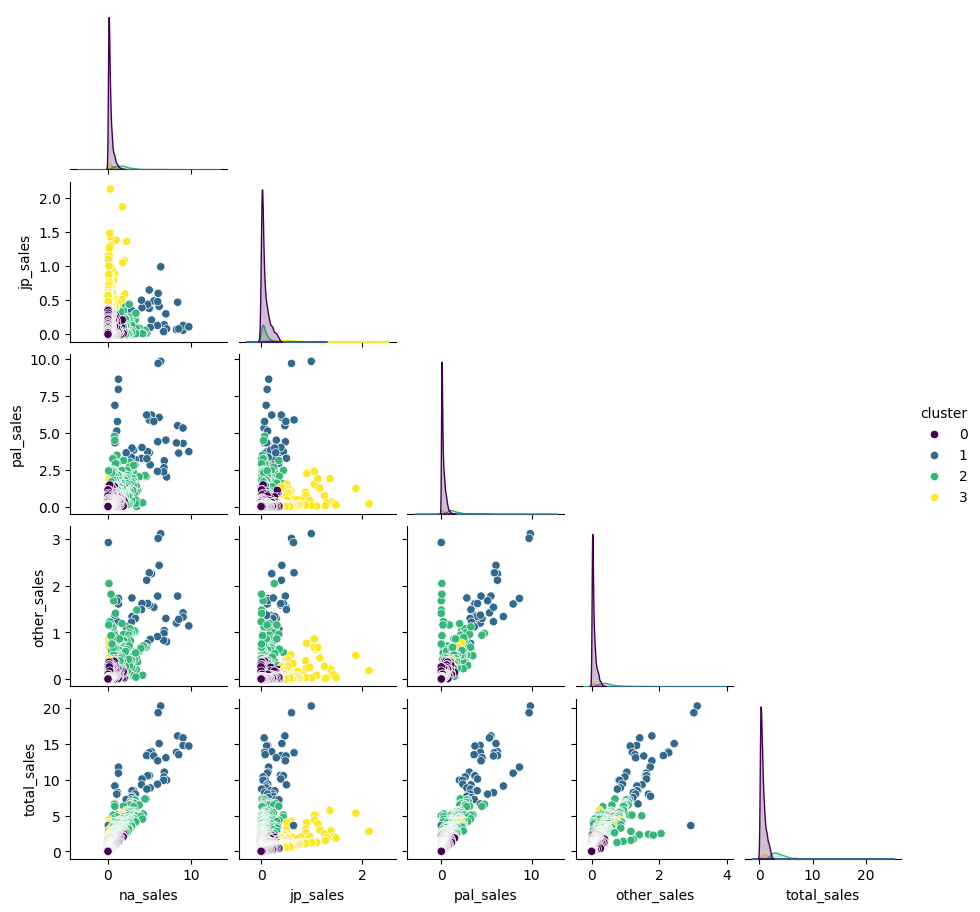

In [29]:
sns.pairplot(df_kmeans_3, hue='cluster', palette='viridis', diag_kind='kde', height=1.85, corner= True)

#K-Prototype Clustering Based on Additional Label Features

In [30]:
!pip install dython

In [31]:
!pip install kmodes

In [32]:
data = df[['console','genre', 'na_sales', 'jp_sales', 'pal_sales', 'critic_score']]
data

console         genre  na_sales  jp_sales  pal_sales  critic_score
0         PS3        Action      6.37      0.99       9.85           9.4
1         PS4        Action      6.06      0.60       9.71           9.7
2         PS2        Action      8.41      0.47       5.49           9.6
3        X360        Action      9.06      0.06       5.33           NaN
4         PS4       Shooter      6.18      0.41       6.05           8.1
...       ...           ...       ...       ...        ...           ...
64011      PC  Visual Novel       NaN       NaN        NaN           NaN
64012     PS4  Visual Novel       NaN       NaN        NaN           NaN
64013      NS  Visual Novel       NaN       NaN        NaN           NaN
64014      NS  Visual Novel       NaN       NaN        NaN           NaN
64015     PS4  Visual Novel       NaN       NaN        NaN           NaN

[64016 rows x 6 columns]

In [33]:
data.isna().sum()

console             0
genre               0
na_sales        51379
jp_sales        57290
pal_sales       51192
critic_score    57338
dtype: int64

In [34]:
from dython.model_utils import metric_graph

from dython.nominal import associations

def associations_example():
    associations( data, nominal_columns=['console', 'genre'])

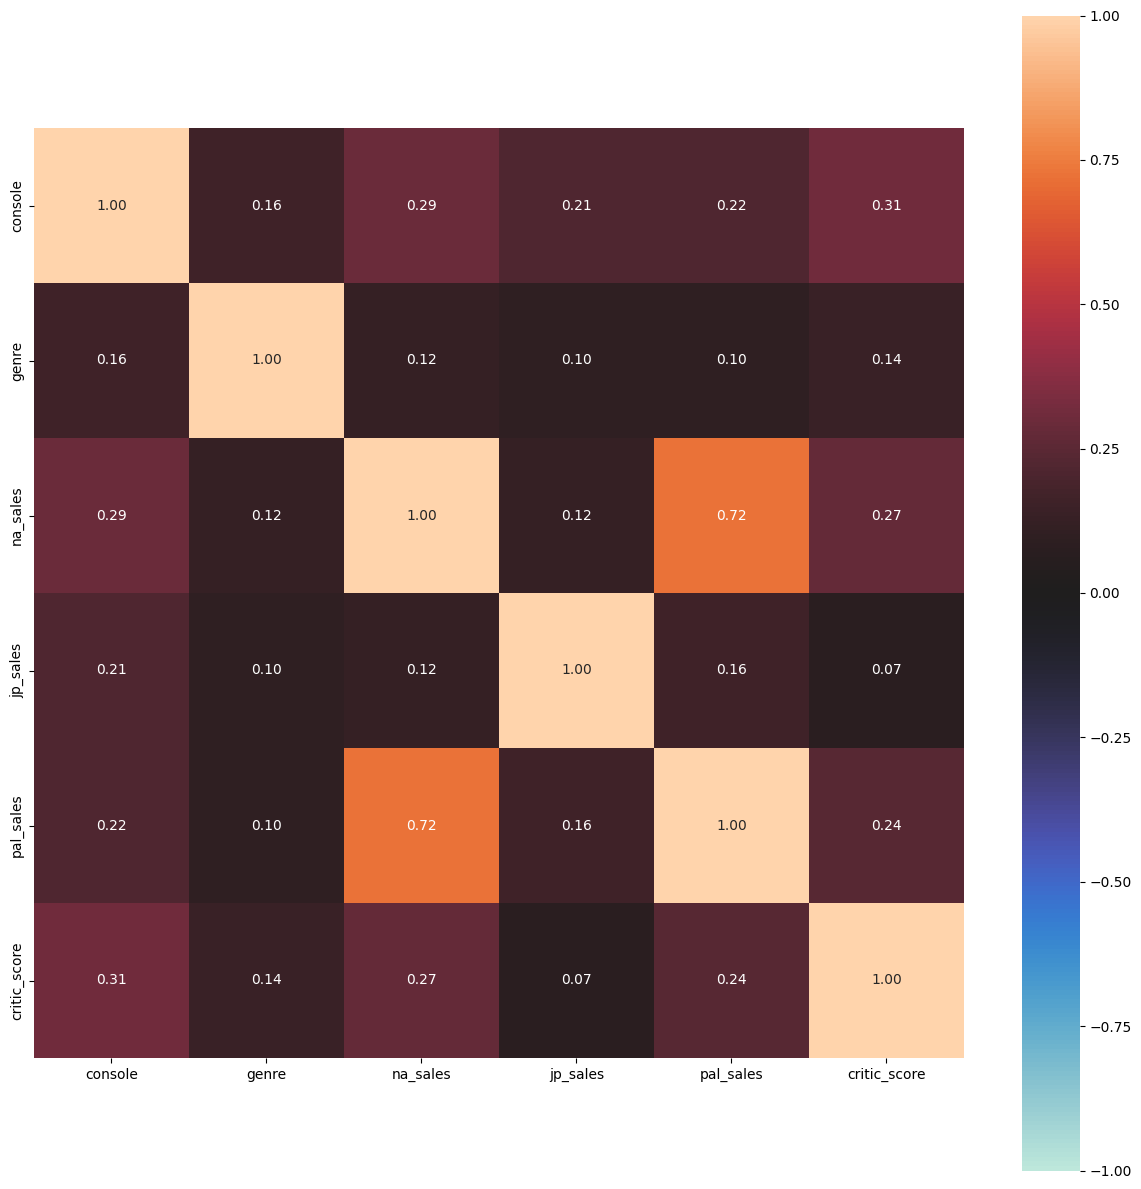

In [35]:
plt.rcParams["figure.figsize"]=15,15
associations_example()

In [36]:
index = [i for i in range(0,81)]


In [37]:
data['genre'].unique()

array(['Action', 'Shooter', 'Action-Adventure', 'Sports', 'Role-Playing',
       'Simulation', 'Racing', 'Music', 'Misc', 'Fighting', 'Platform',
       'Adventure', 'Strategy', 'Puzzle', 'MMO', 'Sandbox', 'Party',
       'Education', 'Board Game', 'Visual Novel'], dtype=object)

In [38]:
data['console']=data['console'].replace(['PS3', 'PS4', 'PS2', 'X360', 'XOne', 'PC', 'PSP', 'Wii', 'PS',
                                          'DS', '2600', 'GBA', 'NES', 'XB', 'PSN', 'GEN', 'PSV', 'DC', 'N64',
                                          'SAT', 'SNES', 'GBC', 'GC', 'NS', '3DS', 'GB', 'WiiU', 'WS', 'VC',
                                          'NG', 'WW', 'SCD', 'PCE', 'XBL', '3DO', 'GG', 'OSX', 'Mob', 'PCFX',
                                          'Series', 'All', 'iOS', '5200', 'And', 'DSiW', 'Lynx', 'Linux',
                                          'MS', 'ZXS', 'ACPC', 'Amig', '7800', 'DSi', 'AJ', 'WinP', 'iQue',
                                          'GIZ', 'VB', 'Ouya', 'NGage', 'AST', 'MSD', 'S32X', 'XS', 'PS5',
                                          'Int', 'CV', 'Arc', 'C64', 'FDS', 'MSX', 'OR', 'C128', 'CDi',
                                          'CD32', 'BRW', 'FMT', 'ApII', 'Aco', 'BBCM', 'TG16'],
                                           index)
data['console']=data['console'].astype(object)

data['genre']=data['genre'].replace(['Action', 'Shooter', 'Action-Adventure', 'Sports', 'Role-Playing',
                                          'Simulation', 'Racing', 'Music', 'Misc', 'Fighting', 'Platform',
                                          'Adventure', 'Strategy', 'Puzzle', 'MMO', 'Sandbox', 'Party',
                                          'Education', 'Board Game', 'Visual Novel'], [i for i in range(0,20)])
data['genre']=data['genre'].astype(object)


In [39]:
data.dtypes

console          object
genre            object
na_sales        float64
jp_sales        float64
pal_sales       float64
critic_score    float64
dtype: object

In [40]:
data = data.dropna()

In [41]:
from kmodes.kprototypes import KPrototypes

# cost = []
# X = data
# for num_clusters in list(range(2,4)):
#     kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42,n_jobs=-2,max_iter=15,n_init=50)
#     kproto.fit_predict(X, categorical=[0, 1])
#     cost.append(kproto.cost_)

# plt.plot(cost)
# plt.xlabel('K')
# plt.ylabel('cost')
# plt.show

In [42]:
X = data.values

In [43]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=3, init='Huang', verbose=0, random_state=42,max_iter=20, n_init=50,n_jobs=-2,gamma=0.15)
clusters = kproto.fit_predict(X, categorical=[0 , 1])

Cluster_id_K_Prototype
2    716
1    421
0     78
Name: count, dtype: int64


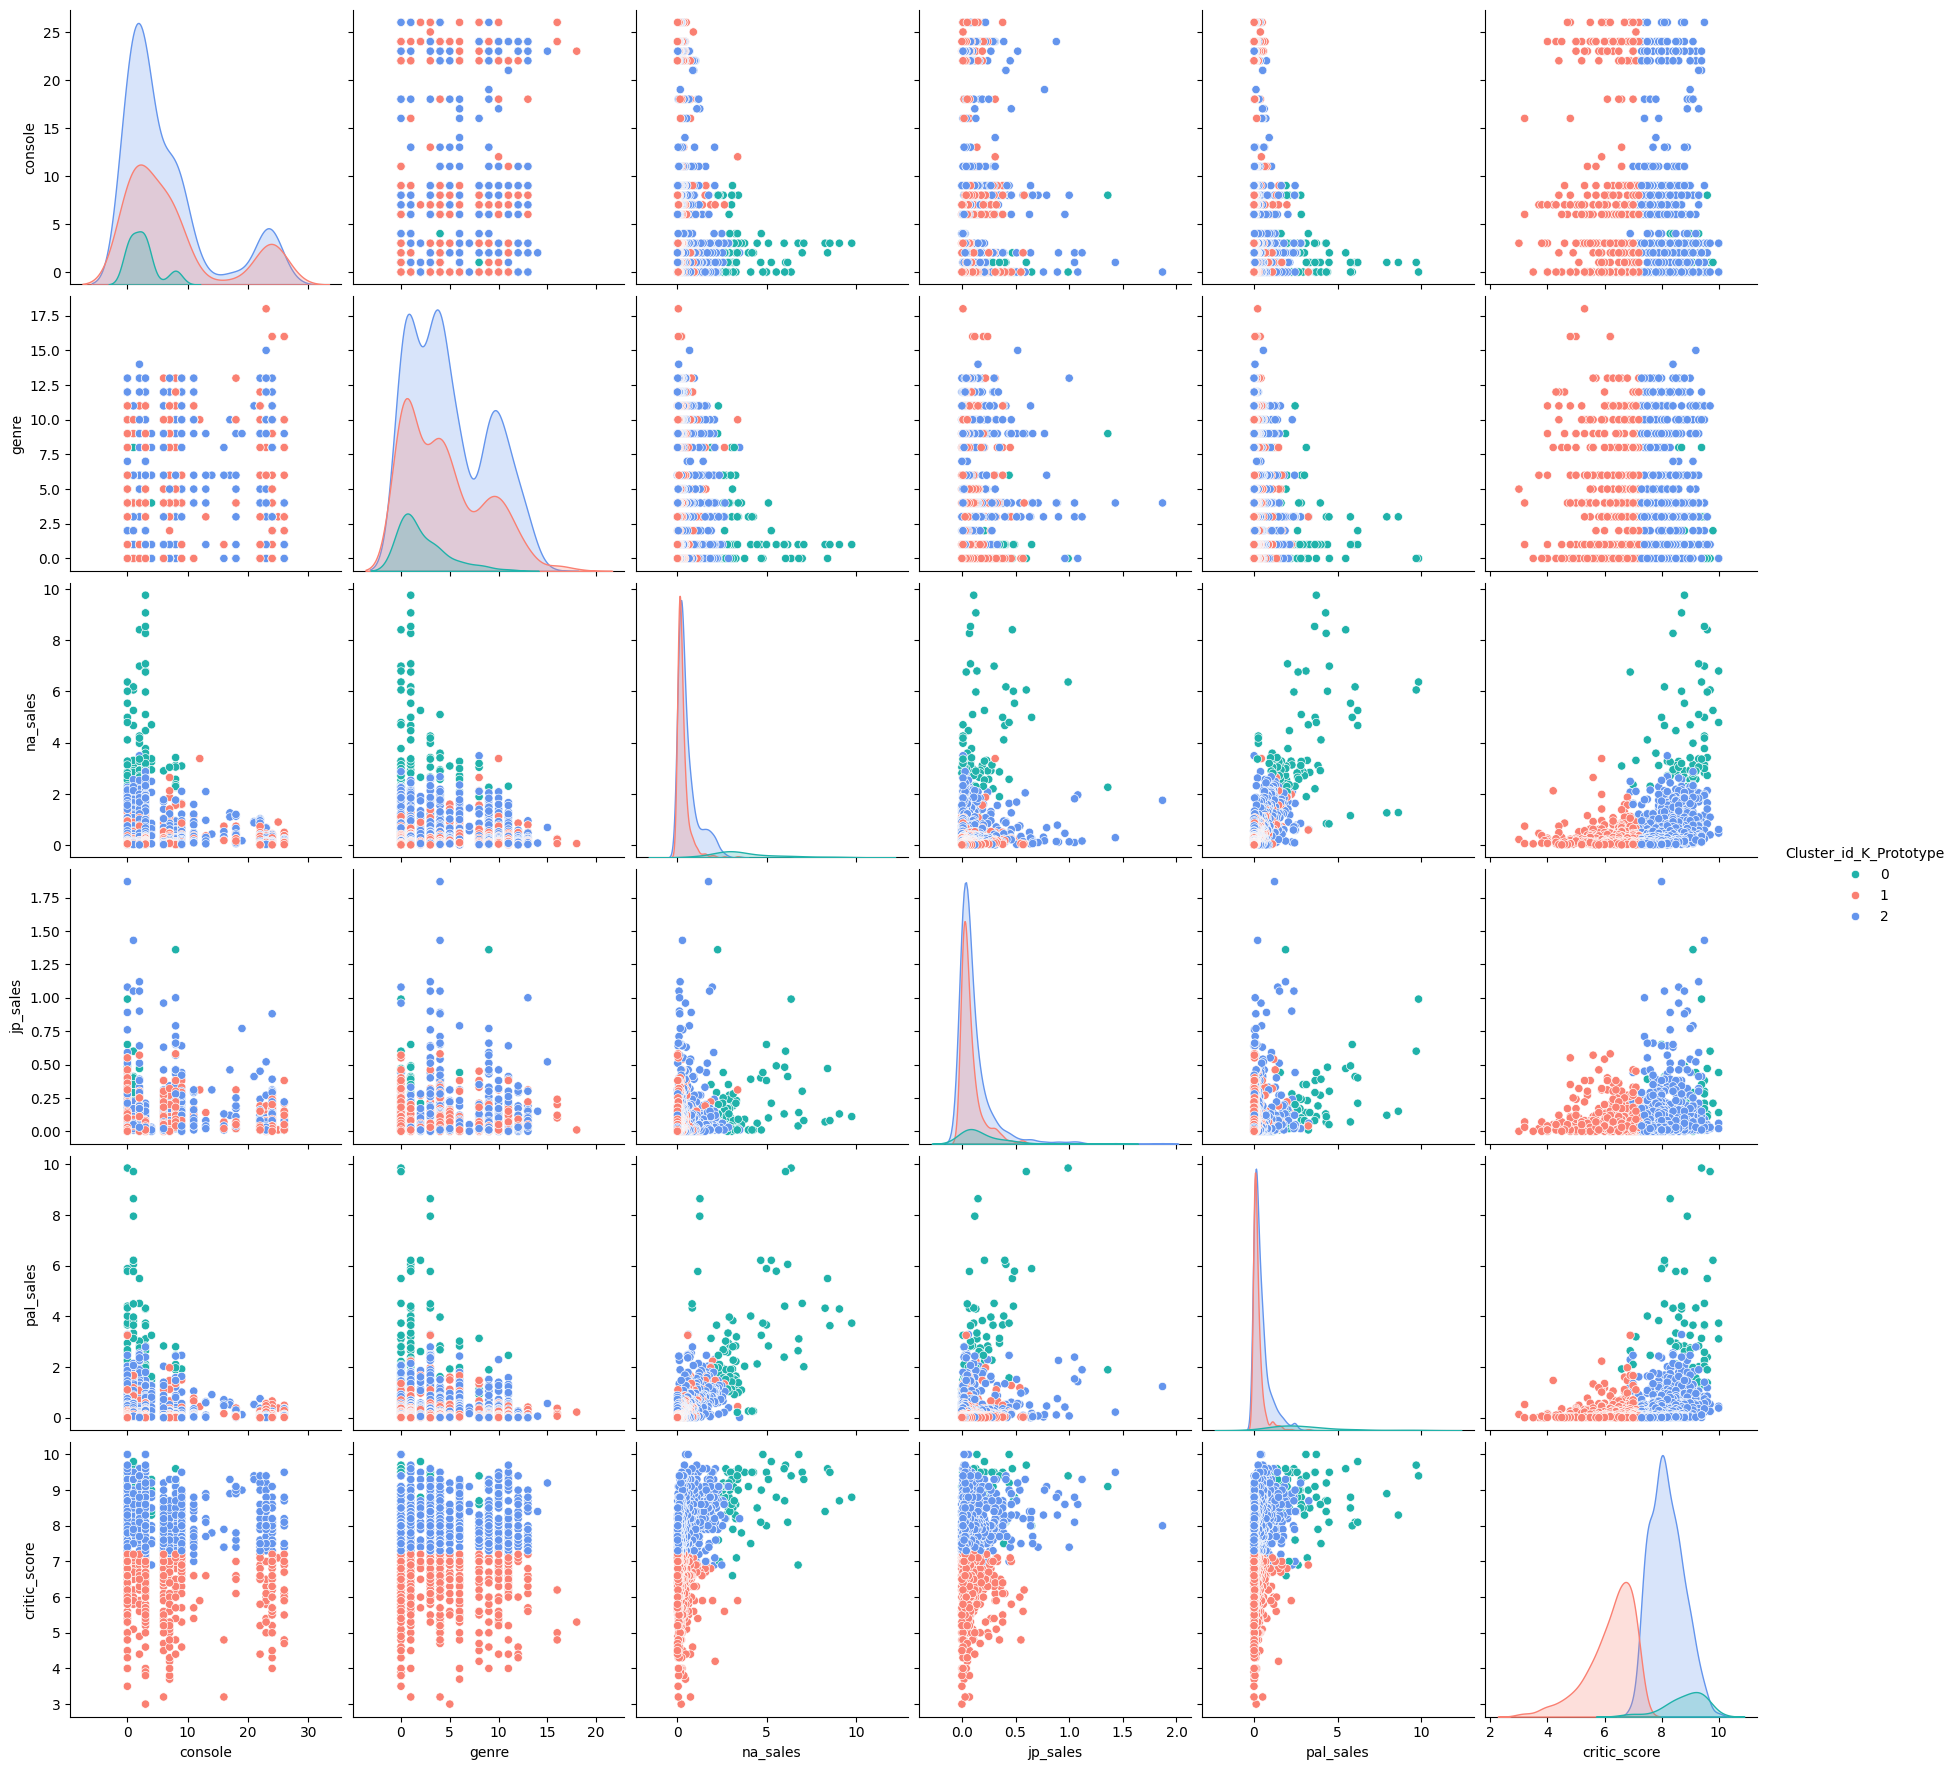

In [44]:
#Visualize K-Prototype clustering
df_sales = pd.DataFrame(data)
df_sales['Cluster_id_K_Prototype']=clusters
print (df_sales['Cluster_id_K_Prototype'].value_counts())
sns.pairplot(df_sales,hue='Cluster_id_K_Prototype',palette={0:'lightseagreen', 1:'salmon', 2:'cornflowerblue'},diag_kind='kde', height=3)

In [105]:
# fig = px.scatter_matrix(df_sales,
#                         dimensions=["console", "genre", "na_sales", "jp_sales", "pal_sales", "critic_score"],
#                         color="Cluster_id_K_Prototype",
#                         height=1500,
#                         width = 1500,)
# fig.show()

#Conclusions